# ISIC CHallange EDA

## Univariant analisys


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="bright")

import os

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ISIC_2020_Training_GroundTruth.csv', sep=',')
df.head(10)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
5,ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign,0
6,ISIC_0074542,IP_4698288,male,25.0,lower extremity,unknown,benign,0
7,ISIC_0075663,IP_6017204,female,35.0,torso,unknown,benign,0
8,ISIC_0075914,IP_7622888,male,30.0,torso,unknown,benign,0
9,ISIC_0076262,IP_5075533,female,50.0,lower extremity,unknown,benign,0


In [ ]:
df.shape

(33126, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [ ]:
df['age_approx'].min()

0.0

In [ ]:
df['age_approx'].max()

90.0

In [ ]:
numerical_cols = ['age_approx']
categorical_cols = ['sex', 'anatom_site_general_challenge']
target_col = 'target'

In [ ]:
df.drop('benign_malignant', axis=1)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,0
...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,0


In [ ]:
for col in categorical_cols:
  print(col,": ", df[col].unique())

patient_id :  ['IP_7279968' 'IP_3075186' 'IP_2842074' ... 'IP_7548727' 'IP_6349217'
 'IP_3645134']
sex :  ['male' 'female' nan]
anatom_site_general_challenge :  ['head/neck' 'upper extremity' 'lower extremity' 'torso' nan 'palms/soles'
 'oral/genital']
diagnosis :  ['unknown' 'nevus' 'melanoma' 'seborrheic keratosis' 'lentigo NOS'
 'lichenoid keratosis' 'solar lentigo' 'cafe-au-lait macule'
 'atypical melanocytic proliferation']


In [ ]:
for col in categorical_cols:
    print(col, (df[col]=='unknown').sum())

patient_id 0
sex 0
anatom_site_general_challenge 0
diagnosis 27124


In [ ]:
df.drop('diagnosis', axis=1)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,benign,0
...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,benign,0


In [ ]:
print((df['sex']=='female').sum())

15981


In [ ]:
print((df['sex']=='male').sum())

17080


In [ ]:
nan_sex = 33126 - (15981 + 17080)
print(nan_sex)

65


In [ ]:
print((df['anatom_site_general_challenge'].isin( ['head/neck' , 'upper extremity' , 'lower extremity' , 'torso' , 'palms/soles' ,
 'oral/genital'])).sum())

32599


In [ ]:
nan_anatom_site_general_challenge = 33126 - 32599
print(nan_anatom_site_general_challenge)

527


<Axes: >

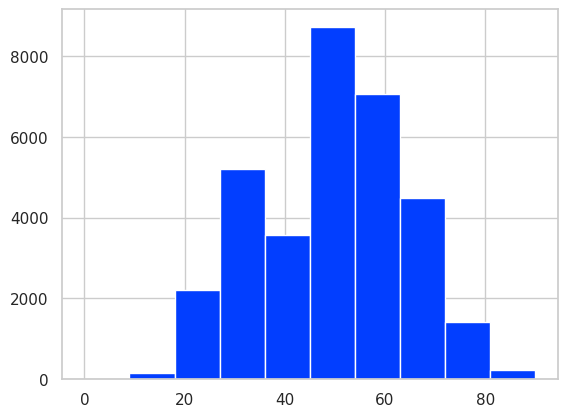

In [ ]:
df['age_approx'].hist()

### Univariate Analysis for Numerical Features - Visualisation


## 🔹 Numerical Feature: age_approx
Mean: 48.87001633492649
Median: 50.0
Mode: 45.0
Min: 0.0
Max: 90.0
Range: 90.0
Variance: 206.79476238592963
Standard Deviation: 14.380360300977499
Skewness: 0.08074471155768628
Kurtosis: -0.48156816522650336


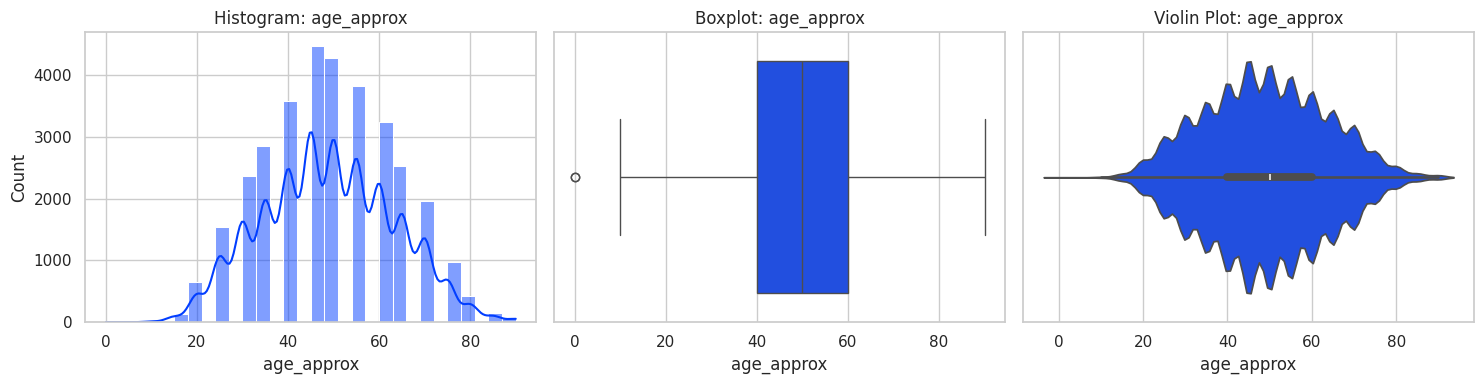


### Univariate Analysis for Categorical Features


## 🔸 Categorical Feature: patient_id
Value Counts:


,count
patient_id,
IP_7279968,115
IP_4382720,115
IP_4938382,115
IP_4479736,115
IP_0656529,114
...,...
IP_8142871,3
IP_4263066,3
IP_4538764,3



Percentage Distribution (%):


,proportion
patient_id,
IP_7279968,0.35
IP_4382720,0.35
IP_4938382,0.35
IP_4479736,0.35
IP_0656529,0.34
...,...
IP_8142871,0.01
IP_4263066,0.01
IP_4538764,0.01



➡️ Cardinality: 2056 unique categories
⚠️ Rare categories (<1.0% of data):


,proportion
patient_id,
IP_7279968,0.35
IP_4382720,0.35
IP_4938382,0.35
IP_4479736,0.35
IP_0656529,0.34
...,...
IP_8142871,0.01
IP_4263066,0.01
IP_4538764,0.01


Most common category (excluding 'unknown'): IP_7279968
Least common category (excluding 'unknown'): IP_8335299


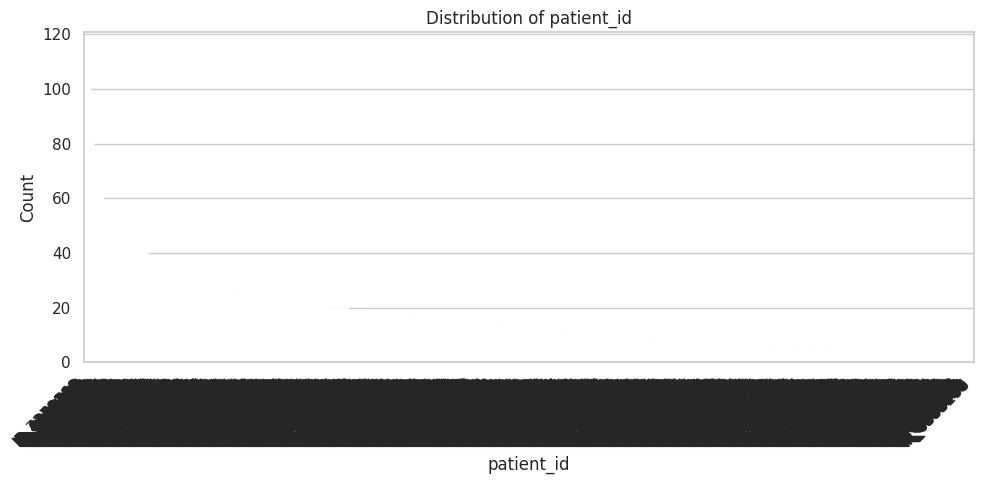



## 🔸 Categorical Feature: sex
Value Counts:


,count
sex,
male,17080
female,15981
NaN,65



Percentage Distribution (%):


,proportion
sex,
male,51.56
female,48.24
NaN,0.20



➡️ Cardinality: 2 unique categories
⚠️ Rare categories (<1.0% of data):


,proportion
sex,
NaN,0.2


Most common category (excluding 'unknown'): male
Least common category (excluding 'unknown'): nan


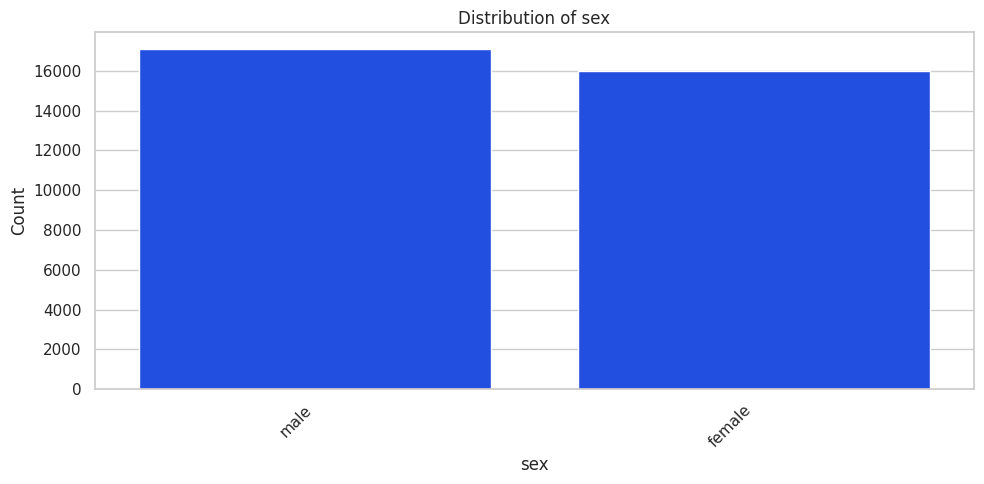



## 🔸 Categorical Feature: anatom_site_general_challenge
Value Counts:


,count
anatom_site_general_challenge,
torso,16845
lower extremity,8417
upper extremity,4983
head/neck,1855
NaN,527
palms/soles,375
oral/genital,124



Percentage Distribution (%):


,proportion
anatom_site_general_challenge,
torso,50.85
lower extremity,25.41
upper extremity,15.04
head/neck,5.60
NaN,1.59
palms/soles,1.13
oral/genital,0.37



➡️ Cardinality: 6 unique categories
⚠️ Rare categories (<1.0% of data):


,proportion
anatom_site_general_challenge,
oral/genital,0.37


Most common category (excluding 'unknown'): torso
Least common category (excluding 'unknown'): oral/genital


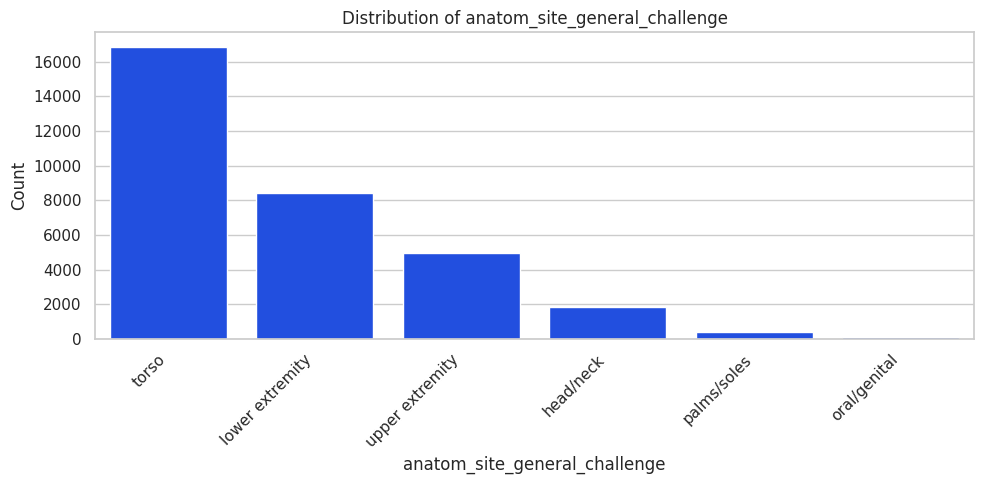



## 🔸 Categorical Feature: diagnosis
Value Counts:


,count
diagnosis,
unknown,27124
nevus,5193
melanoma,584
seborrheic keratosis,135
lentigo NOS,44
lichenoid keratosis,37
solar lentigo,7
cafe-au-lait macule,1
atypical melanocytic proliferation,1



Percentage Distribution (%):


,proportion
diagnosis,
unknown,81.88
nevus,15.68
melanoma,1.76
seborrheic keratosis,0.41
lentigo NOS,0.13
lichenoid keratosis,0.11
solar lentigo,0.02
cafe-au-lait macule,0.00
atypical melanocytic proliferation,0.00



➡️ Cardinality: 9 unique categories
⚠️ Rare categories (<1.0% of data):


,proportion
diagnosis,
seborrheic keratosis,0.41
lentigo NOS,0.13
lichenoid keratosis,0.11
solar lentigo,0.02
cafe-au-lait macule,0.00
atypical melanocytic proliferation,0.00


Most common category (excluding 'unknown'): nevus
Least common category (excluding 'unknown'): cafe-au-lait macule
Percentage of 'unknown': 81.88%
Consider: impute, remove, or retain 'unknown' as a separate category.


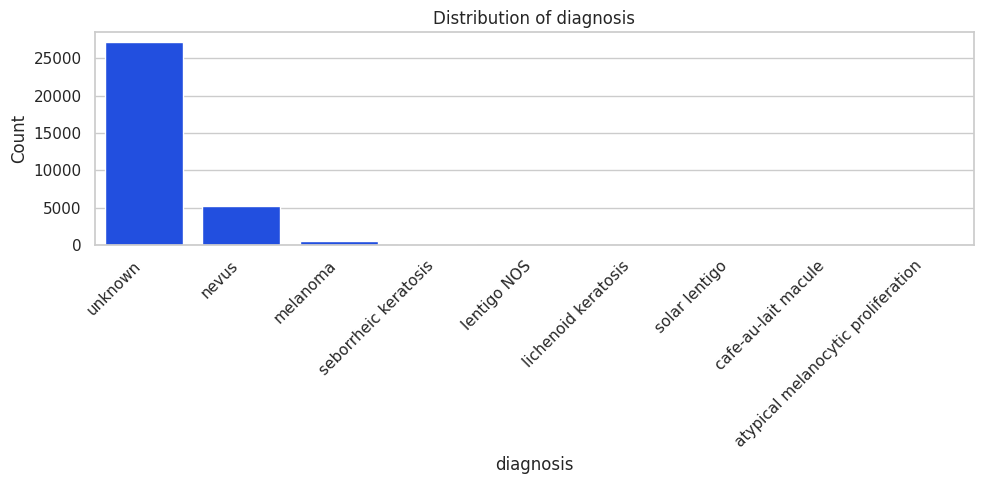

In [ ]:
print("### Univariate Analysis for Numerical Features - Visualisation")

for col in numerical_cols:

    print(f"\n\n## 🔹 Numerical Feature: {col}")

    # Basic statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0] if not df[col].mode().empty else "N/A"
    min_val = df[col].min()
    max_val = df[col].max()
    value_range = max_val - min_val
    variance = df[col].var()
    std_dev = df[col].std()
    skew_val = df[col].skew()
    kurt_val = df[col].kurt()

    # Print statistics
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    print(f"Min: {min_val}")
    print(f"Max: {max_val}")
    print(f"Range: {value_range}")
    print(f"Variance: {variance}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Skewness: {skew_val}")
    print(f"Kurtosis: {kurt_val}")

    # Plots
    plt.figure(figsize=(15, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram: {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')

    # Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df[col])
    plt.title(f'Violin Plot: {col}')

    plt.tight_layout()
    plt.show()



print("\n### Univariate Analysis for Categorical Features")

for col in categorical_cols:

    print(f"\n\n## 🔸 Categorical Feature: {col}")

    value_counts = df[col].value_counts(dropna=False)
    value_percentages = df[col].value_counts(normalize=True, dropna=False) * 100

    # Print stats
    print("Value Counts:")
    display(value_counts)

    print("\nPercentage Distribution (%):")
    display(value_percentages.round(2))

    # 1. Cardinality
    cardinality = df[col].nunique()
    print(f"\n➡️ Cardinality: {cardinality} unique categories")

    # 2. Rare category detection (<1% of data)
    rare_threshold = 1.0  # percent
    rare_categories = value_percentages[value_percentages < rare_threshold]
    if not rare_categories.empty:
        print(f"⚠️ Rare categories (<{rare_threshold}% of data):")
        display(rare_categories.round(2))
    else:
        print("No rare categories (<1%) detected.")

    # 3. Mode analysis
    filtered_counts = value_counts.drop('unknown', errors='ignore')
    most_common = filtered_counts.idxmax()
    least_common = filtered_counts.idxmin()
    print(f"Most common category (excluding 'unknown'): {most_common}")
    print(f"Least common category (excluding 'unknown'): {least_common}")

    # 4. Missing or 'unknown' handling
    if 'unknown' in value_counts.index:
        unknown_pct = value_percentages['unknown']
        print(f"Percentage of 'unknown': {unknown_pct:.2f}%")
        # Optional suggestion
        if unknown_pct > 0:
            print("Consider: impute, remove, or retain 'unknown' as a separate category.")

    # Bar plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## Multivariant

In [ ]:
def plot_correlation_matrix(corr, title):
    plt.figure(figsize=(12,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title(title)
    plt.show()

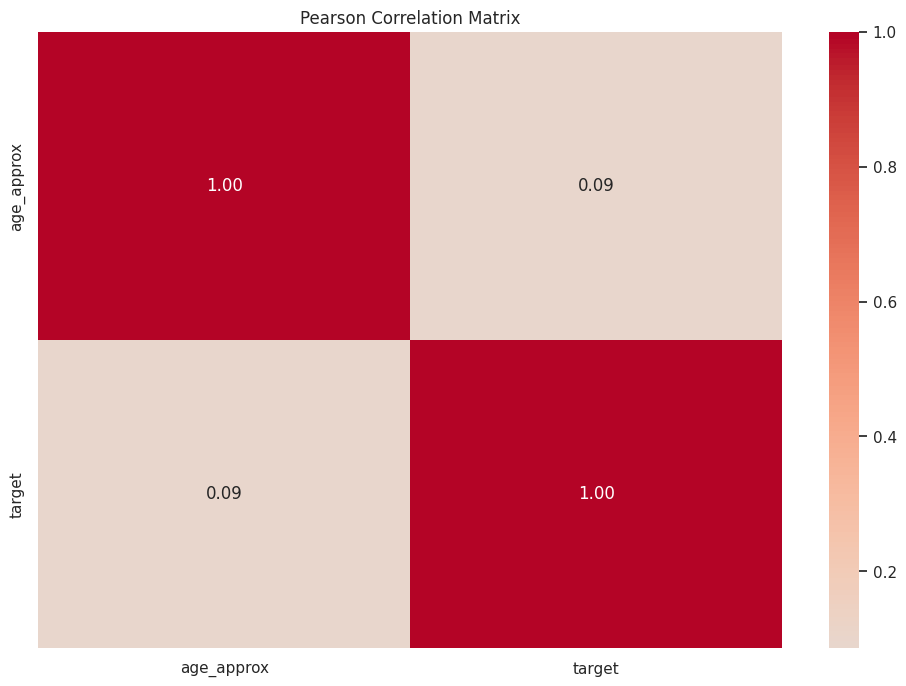

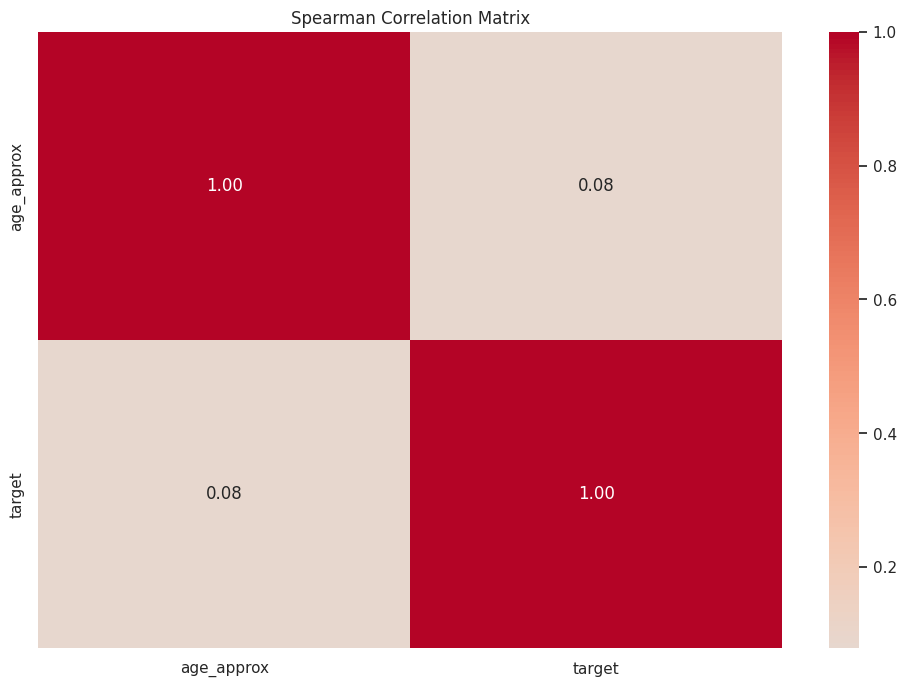

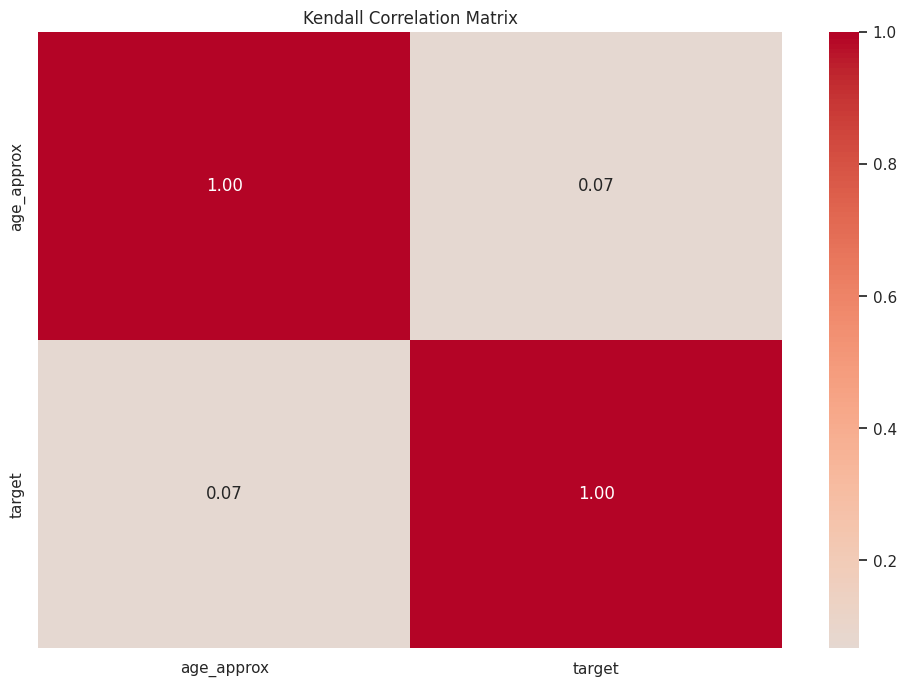

In [ ]:
# Pearson correlation (linear)
numerical_cols.append('target')

pearson_corr = df[numerical_cols].corr(method='pearson')
# Spearman correlation (monotonic)
spearman_corr = df[numerical_cols].corr(method='spearman')
# Kendall correlation (monotonic, less sensitive to outliers)
kendall_corr = df[numerical_cols].corr(method='kendall')
# Plot correlations
plot_correlation_matrix(pearson_corr, "Pearson Correlation Matrix")
plot_correlation_matrix(spearman_corr, "Spearman Correlation Matrix")
plot_correlation_matrix(kendall_corr, "Kendall Correlation Matrix")



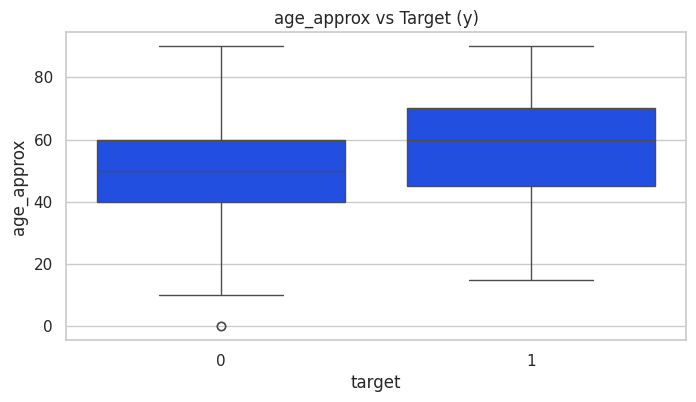

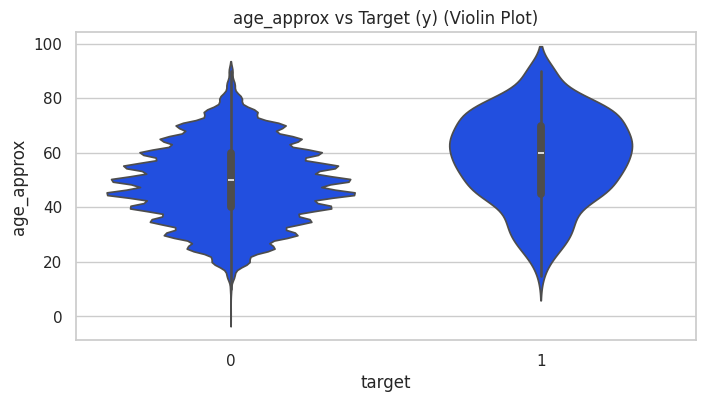

In [ ]:
# Numerical Features vs Target
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs Target (y)')
    plt.show()

# Optional: violin plots
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.violinplot(x='target', y=col, data=df)
    plt.title(f'{col} vs Target (y) (Violin Plot)')
    plt.show()

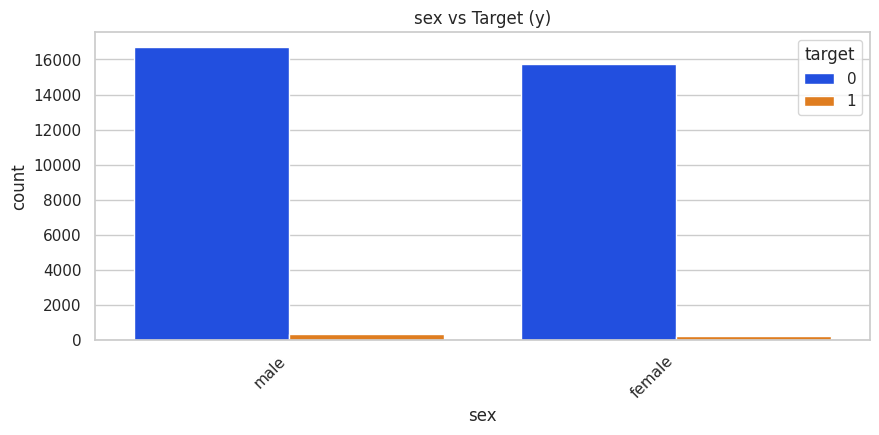


Percentage of 'yes' per category in sex:
 target          0         1
sex                        
female  98.623365  1.376635
male    97.868852  2.131148


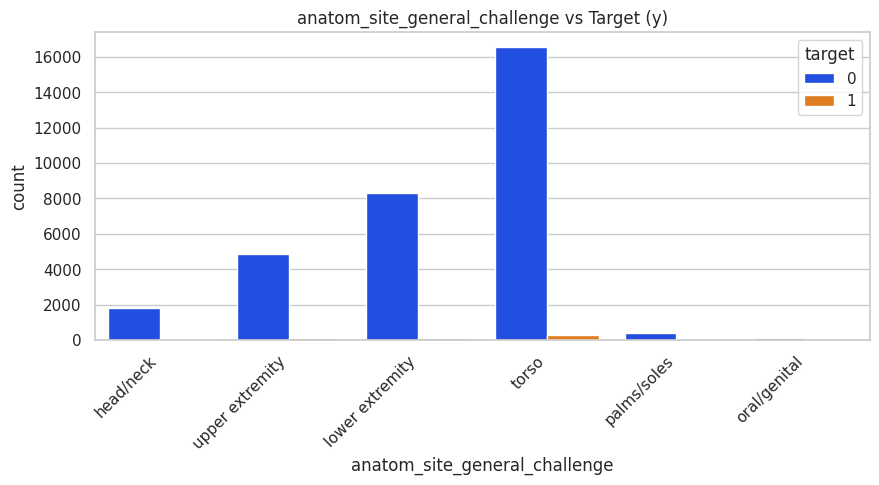


Percentage of 'yes' per category in anatom_site_general_challenge:
 target                                 0         1
anatom_site_general_challenge                     
head/neck                      96.010782  3.989218
lower extremity                98.526791  1.473209
oral/genital                   96.774194  3.225806
palms/soles                    98.666667  1.333333
torso                          98.474325  1.525675
upper extremity                97.772426  2.227574


In [ ]:
# Categorical Features vs Target
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} vs Target (y)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Crosstab example
    ct = pd.crosstab(df[col], df['target'], normalize='index')*100
    print(f"\nPercentage of 'yes' per category in {col}:\n", ct)

<Axes: >

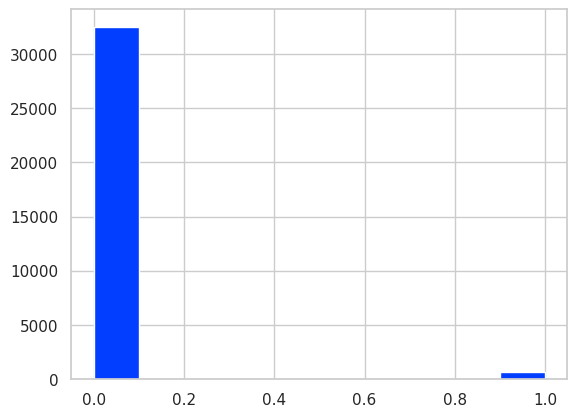

In [ ]:
df['target'].hist()

In [ ]:
print("benign", (df['target']==0).sum())

benign 32542


In [ ]:
print("malign", (df['target']==1).sum())

malign 584
